# Price and Points Analysis

In [1]:
# Import all necessary librarys 

import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

%load_ext autoreload
%autoreload 2

# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

import plotly.plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.offline import iplot

import cufflinks
cufflinks.go_offline()

In [2]:
# Import dataset

df = pd.read_csv("wine_filtered.csv")

# Visualize DataFrame types 

df.dtypes

Unnamed: 0                   0
country                     59
description                  0
designation              34545
points                       0
price                     8395
province                    59
region_1                 19560
region_2                 73219
taster_name              24917
taster_twitter_handle    29446
title                        0
variety                      1
winery                       0
vintage                      0
dtype: int64


In [18]:
# Check how many valors == NaN in columns

print(df.isnull().sum())

Unnamed: 0                 int64
country                   object
description               object
designation               object
points                     int64
price                    float64
province                  object
region_1                  object
region_2                  object
taster_name               object
taster_twitter_handle     object
title                     object
variety                   object
winery                    object
vintage                    int64
log_price                float64
dtype: object

In [3]:
# Filter price column, eliminate lines with price  == NaN

df_filtered = df[pd.notnull(df['price'])]

In [4]:
# Eliminate lines with variety == NaN

df_filtered = df_filtered[pd.notnull(df_filtered['variety'])]

# Check how many values == NaN in columns, step for confirm the below step

print(df_filtered.isnull().sum())

Unnamed: 0                   0
country                     55
description                  0
designation              32059
points                       0
price                        0
province                    55
region_1                 18012
region_2                 65024
taster_name              23272
taster_twitter_handle    27755
title                        0
variety                      0
winery                       0
vintage                      0
dtype: int64


In [5]:
# Calculate the correlation of each column 

corrs = df_filtered.corr()
corrs.round(2)

,Unnamed: 0,points,price,vintage
Unnamed: 0,1.00,0.01,0.01,0.01
points,0.01,1.00,0.42,0.07
price,0.01,0.42,1.00,0.02
vintage,0.01,0.07,0.02,1.00


In [6]:
# View some basic statistical details like percentile, mean, std, min, max

desc = df_filtered[['points', 'price']].describe()
desc 

,points,price
count,111592.000000,111592.000000
mean,88.413972,35.620914
std,3.098781,42.103880
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


<Figure size 4500x3000 with 0 Axes>

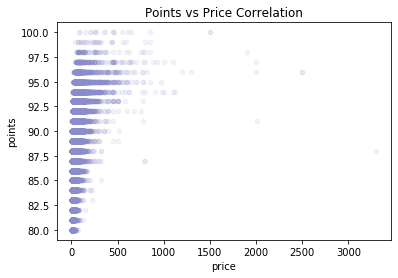

<Figure size 4500x3000 with 0 Axes>

In [35]:
# Plot correlation variables points and price 

figure1 = df_filtered.plot.scatter(x='price', y='points',c='#8B8CCC', 
                                   alpha=0.1,title='Points vs Price Correlation')

plt.show()

###### Obs.:

The interval of price is from 4 to 3300, meanwhile points's interval is from 80 to 100. Because of that, is necessary normalize the dataset. 

In [9]:
# Normalize DataFrame by Zscore

from scipy.stats import zscore
df_norm = df_filtered[['price', 'points']].apply(zscore)

# View some basic statistical details after normalization by zscore

df_norm.describe()

,price,points
count,1.115920e+05,1.115920e+05
mean,-3.947743e-18,-1.373814e-15
std,1.000004e+00,1.000004e+00
min,-7.510247e-01,-2.715265e+00
25%,-4.422632e-01,-7.790106e-01
50%,-2.522561e-01,-1.335926e-01
75%,1.515090e-01,8.345344e-01
max,7.753190e+01,3.738916e+00


In [10]:
# Correlation coefficient before e after zscore 

corr_before_zscore = np.corrcoef(df_filtered['points'],df_filtered['price'])

corr_after_zscore = np.corrcoef(df_norm['points'], df_norm['price'])

print('Correlation coefficient Before Zscore: %.3f \nCorrelation coefficient After Zscore: %.3f' % (corr_before_zscore[0][1], corr_after_zscore[0][1]))

Correlation coefficient Before Zscore: 0.417 
Correlation coefficient After Zscore: 0.417


In [11]:
# Create a column log_price from price column
 
df_filtered['log_price'] = np.log(df_filtered['price'])

# Visualize our DataFrame

print(df_filtered.isnull().sum())

Unnamed: 0                   0
country                     55
description                  0
designation              32059
points                       0
price                        0
province                    55
region_1                 18012
region_2                 65024
taster_name              23272
taster_twitter_handle    27755
title                        0
variety                      0
winery                       0
vintage                      0
log_price                    0
dtype: int64


In [19]:
# Visualize column log_price in DataFrame 

df_filtered.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,vintage,log_price
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2011,2.708050
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2013,2.639057
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2013,2.564949
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2012,4.174387
5,5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,2011,2.708050


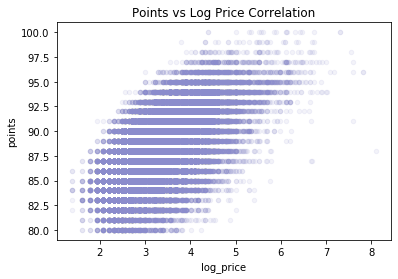

In [27]:
# Plot correlation variables points and log of price 

corr_graf2 = df_filtered.plot.scatter(x='log_price', y='points',c='#8B8CCC', 
                                      alpha=0.1, title='Points vs Log Price Correlation')
plt.show()

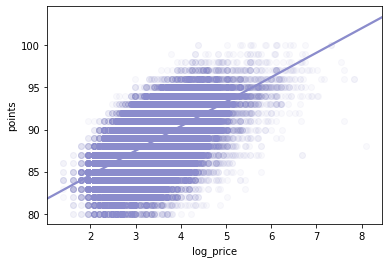

In [29]:
# Make a linear regression: 95% confidence interval (ci)

sns.regplot(x='log_price', y='points', data=df_filtered, 
            scatter_kws={'alpha':0.05}, ci=95, color='#8B8CCC',)
plt.show()


In [37]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

ModuleNotFoundError: No module named 'wordcloud'

In [40]:
points_quart4 = (df_filtered['points'] >= 80 & <= 82.reset_index(drop=True))
points_quart4 = points_quart4.dropna().reset_index(drop=True)

SyntaxError: invalid syntax (<ipython-input-40-0348ee90f16a>, line 1)

In [36]:
# Wine by POINTS

qt1_txt = str(score_quart1.description)
qt2_txt = str(score_quart2.description)
qt3_txt = str(score_quart3.description)
qt4_txt = str(score_quart4.description)

stopwords = set(STOPWORDS)

# We remove words that are common among all descriptions, in order to see if there is one characteristic
# that differentiates these wines
stopwords.update(["drink", "now", "wine", "flavor", "flavors", "aroma", "aromas"])

# Figures

plt.figure(figsize=(15,15))

plt.subplot(2, 2, 1)
plt.title('Q1 by score (lowest-scoring)', fontsize=15)
wordcloud = WordCloud(stopwords=stopwords, background_color='white').generate(qt1_txt)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

#------

plt.subplot(2, 2, 2)
plt.title('Q2 by score', fontsize=15)
wordcloud = WordCloud(stopwords=stopwords, background_color='white').generate(qt2_txt)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

#------

plt.subplot(2, 2, 3)
plt.title('Q3 by score', fontsize=15)
wordcloud = WordCloud(stopwords=stopwords, background_color='white').generate(qt3_txt)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

#------

plt.subplot(2, 2, 4)
plt.title('Q4 by score (highest-scoring)', fontsize=15)
wordcloud = WordCloud(stopwords=stopwords, background_color='white').generate(qt4_txt)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.tight_layout()
plt.show()

NameError: name 'score_quart1' is not defined